In [227]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8, 6) #Adjusts the configuration of the plots we will create

#Read in the data
df = pd.read_csv('movies.csv')

In [205]:
#Look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [206]:
#if there is any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [207]:
df[ df[col].isnull() ]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,NaN,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,NaN,NaN,NaN,NaN
6195,One for the Money,PG-13,Action,2012,"January 27, 2012 (United States)",5.3,41000.0,Julie Anne Robinson,Stacy Sherman,Katherine Heigl,United States,40000000.0,38084162.0,Lakeshore Entertainment,NaN
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN


In [208]:
#Data types for our columns
df.dtypes

name object
rating object
genre object
year int64
released object
score float64
votes float64
director object
writer object
star object
country object
budget float64
gross float64
company object
runtime float64
dtype: object

In [229]:
#change data type of columns
df['budget'] = df['budget'].astype('int')
df['gross'] = df['gross'].astype('int')

In [230]:
#i can't change data type because col 'budget' and 'gross' have missing value
#i fill missing value = mean() and change data type again
df['score'].fillna(df['score'].mean(),inplace=True)
df['runtime'].fillna(df['runtime'].mean(),inplace=True)
df['budget'].fillna(df['budget'].mean(),inplace=True)
df['gross'].fillna(df['gross'].mean(),inplace=True)

#check data type
df.dtypes

name object
rating object
genre object
year int64
released object
score float64
votes float64
director object
writer object
star object
country object
budget int64
gross int64
company object
runtime float64
dtype: object

In [231]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [214]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

<Axes: >

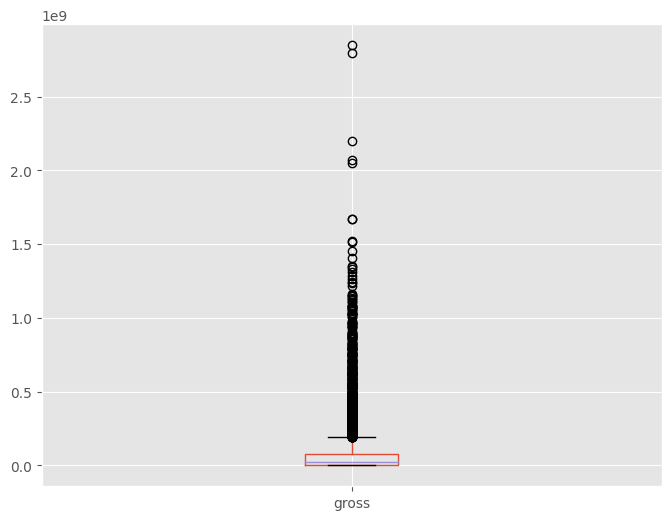

In [232]:
# Are there any Outliers?
df.boxplot(column=['gross'])

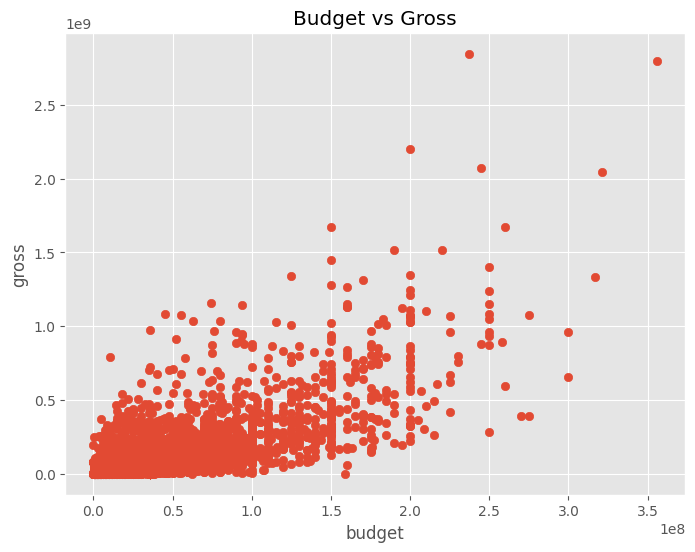

In [220]:
#Budget high correlation, Company high correlation
#Scatter plot with budget vs gross
plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('budget')
plt.ylabel('gross')
plt.show()

In [216]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


<Axes: xlabel='budget', ylabel='gross'>

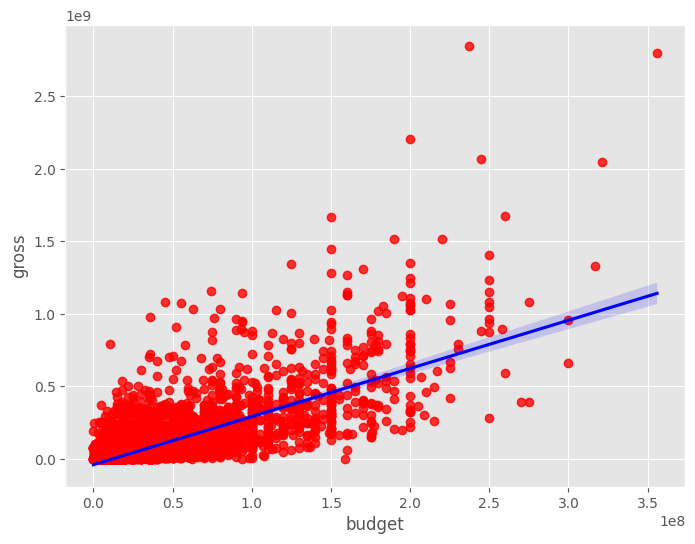

In [217]:
#there exists a positive correlation between budget and gross
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [218]:
#looking at correlation by pearson method
df.corr(method='pearson')

<ipython-input-218-f31220400ef0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,year,score,votes,budget,gross,runtime
year,1.000000,0.097936,0.222945,0.265578,0.252042,0.120766
score,0.097936,1.000000,0.409182,0.064541,0.182868,0.399329
votes,0.222945,0.409182,1.000000,0.421090,0.628713,0.309204
budget,0.265578,0.064541,0.421090,1.000000,0.711270,0.265287
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241335
runtime,0.120766,0.399329,0.309204,0.265287,0.241335,1.000000


<ipython-input-219-82b9e550046b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


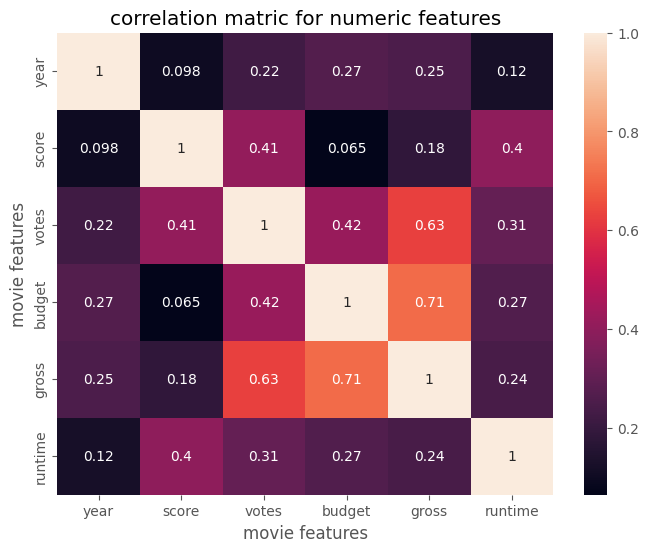

In [219]:
#use heatmap to see the correlation
#high correlation between budget and gross is positive correlation = 0.750157
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('correlation matric for numeric features')
plt.xlabel('movie features')
plt.ylabel('movie features')
plt.show()

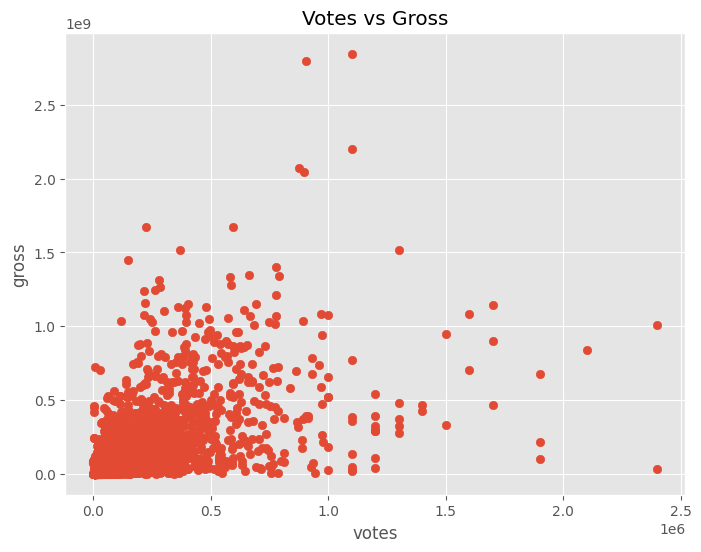

In [222]:
#higher voted movies will have a higher gross earning
#Scatter plot with votes vs gross
plt.scatter(x = df['votes'], y = df['gross'])
plt.title('Votes vs Gross')
plt.xlabel('votes')
plt.ylabel('gross')
plt.show()

<Axes: xlabel='votes', ylabel='gross'>

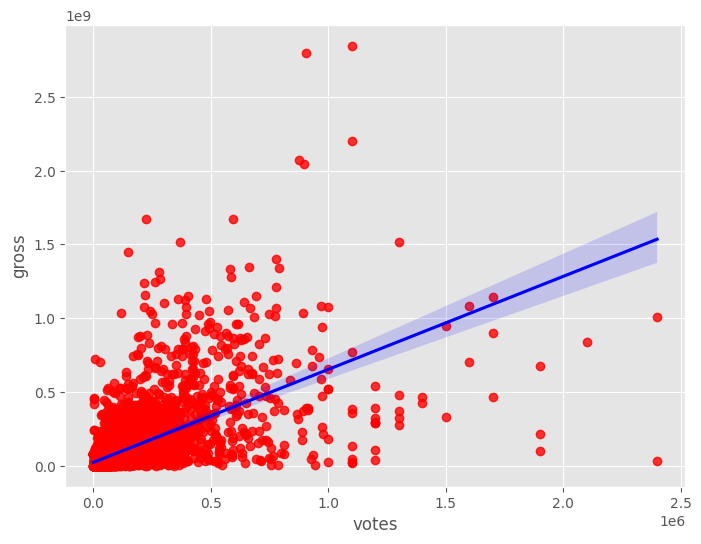

In [223]:
#there exists a positive correlation between gross and votes
sns.regplot(x='votes', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [226]:
#convert origina data to category data
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

In [233]:
#compare data between original data and category data
df

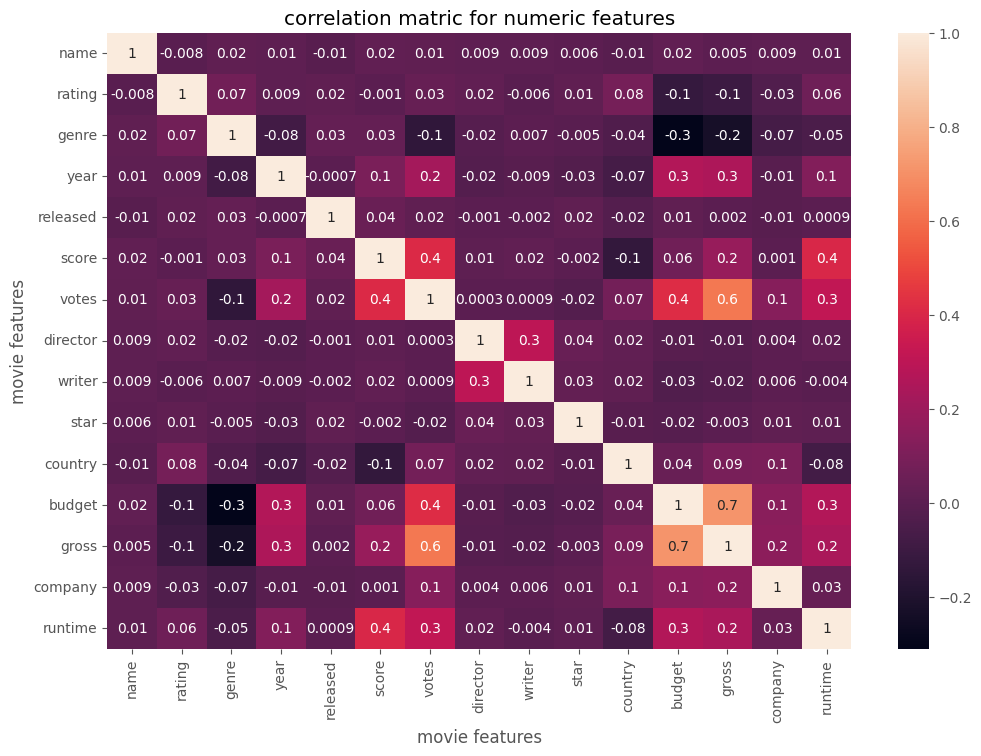

In [237]:
#use heatmap to see the correlation
#vote and budget have the highest correlation to gross earnings
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, fmt=".1g")
matplotlib.rcParams['figure.figsize'] = (12, 10)
plt.title('correlation matric for numeric features')
plt.xlabel('movie features')
plt.ylabel('movie features')
plt.show()

In [238]:
#distribution correlation of category data
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017095,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020368,0.005466,0.009211,0.010390
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001310,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.126046,-0.102116,-0.032943,0.062051
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027959,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.310566,-0.230267,-0.071067,-0.052699
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097936,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.265578,0.252042,-0.010431,0.120766
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042779,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.012263,0.001636,-0.010474,0.000867
score,0.017095,-0.001310,0.027959,0.097936,0.042779,1.000000,0.409182,0.009559,0.019410,-0.001609,-0.133343,0.064541,0.182868,0.001030,0.399329
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.421090,0.628713,0.133204,0.309204
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.010364,-0.014272,0.004404,0.017624
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019410,0.000892,0.299067,1.000000,0.027245,0.015343,-0.033216,-0.023210,0.005646,-0.003510
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.016628,-0.002682,0.012442,0.010171


In [239]:
#unstack value
correlation_mat = df_numerized.corr()
cor_pairs = correlation_mat.unstack()

cor_pairs

In [240]:
#sort correlation value = ascending
sorted_pairs = cor_pairs.sort_values()
sorted_pairs

In [241]:
#sort correlation > 0.5
#vote and budget have the highest correlation to gross earnings
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross votes 0.628713
votes gross 0.628713
budget gross 0.711270
gross budget 0.711270
name name 1.000000
director director 1.000000
gross gross 1.000000
budget budget 1.000000
country country 1.000000
star star 1.000000
writer writer 1.000000
votes votes 1.000000
score score 1.000000
released released 1.000000
year year 1.000000
genre genre 1.000000
rating rating 1.000000
company company 1.000000
runtime runtime 1.000000
dtype: float64